In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

# Set default figure size for matplotlib
plt.rcParams['figure.figsize'] = [15, 6]

# --- Step 1: Load and visualize the new dataset ---

In [15]:
# Define the folder with homework data
folder = './Data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

# Print the number of images in each class
print(f'Number of samples in class 0: {len(images_0)}')
print(f'Number of samples in class 1: {len(images_1)}')


Number of samples in class 0: 2220
Number of samples in class 1: 2250



--- Examples from Class 0 ---


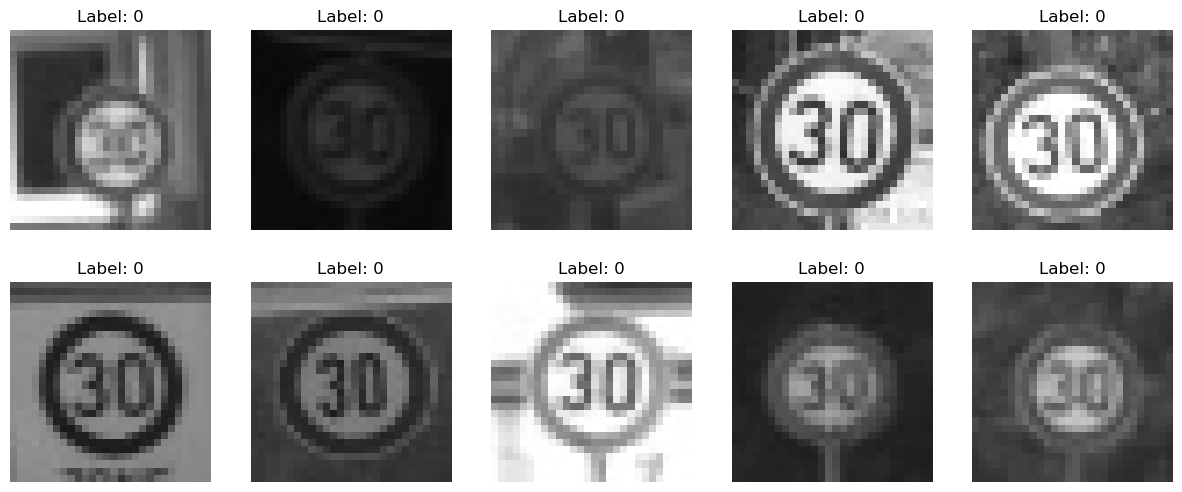

In [16]:
# Visualize some examples from class 0
print("\n--- Examples from Class 0 ---")
plt.figure()
for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {labels_0[idx]}')
    plt.axis('off')
plt.show()


--- Examples from Class 1 ---


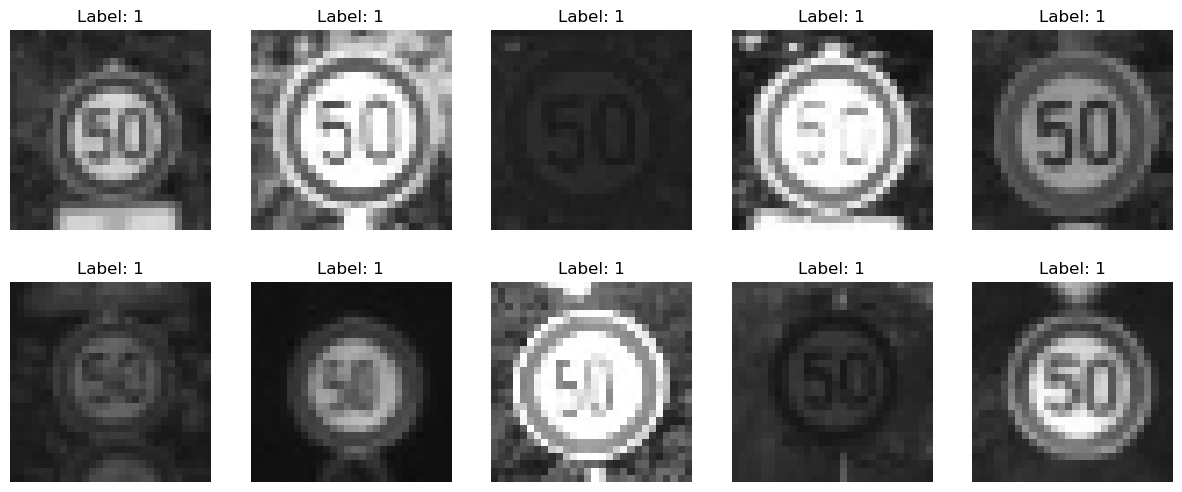

In [17]:
# Visualize some examples from class 1
print("\n--- Examples from Class 1 ---")
plt.figure()
for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {labels_1[idx]}')
    plt.axis('off')
plt.show()

In [20]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

# --- Step 2: Train the single-neuron model ---

In [21]:
# 1. Prepare the data
# Combine images and labels from both classes
images = images_0 + images_1
labels = labels_0 + labels_1

# Shuffle the data to ensure randomness
images, labels = shuffle(images, labels)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Flatten images from 2D matrices to 1D vectors and normalize
pixels = np.array([image.flatten() for image in images]) / 255.0

print(f'Shape of flattened pixels: {pixels.shape}')
print(f'Shape of labels: {labels.shape}')

Shape of flattened pixels: (4470, 784)
Shape of labels: (4470,)


In [23]:
# 2. Build the single-neuron model
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model_single_neuron = Model(inputs, outputs)

model_single_neuron.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# 3. Compile and train the model
model_single_neuron.compile(optimizer='adam', loss='mean_squared_error')
history = model_single_neuron.fit(pixels, labels, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.2853
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.2196
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.1717
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1477
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.1312
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.1241
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.1155
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1074
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.0992
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0979


In [25]:
# 4. Evaluate the performance
# Get predictions from the model
predictions_raw = model_single_neuron.predict(pixels).squeeze()
# Convert raw predictions to class labels (0 or 1) using a 0.5 threshold
predictions = (predictions_raw > 0.5).astype(int)

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


In [27]:
# Calculate accuracy
correct = np.sum(predictions == labels)
accuracy = correct / len(labels)

print(f'\nAccuracy with a single neuron: {accuracy * 100:.2f}%')


Accuracy with a single neuron: 89.26%


# --- Step 3: Improve the model ---

In [29]:
# 1. Build an improved model with hidden layers
inputs = Input(shape=(pixels.shape[1],))

# First hidden layer with 64 neurons and ReLU activation
x = Dense(64, activation='relu')(inputs)
# Second hidden layer with 32 neurons and ReLU activation
x = Dense(32, activation='relu')(x)

# Output layer with 1 neuron and Sigmoid activation for binary classification
outputs = Dense(1, activation='sigmoid')(x)

model_improved = Model(inputs, outputs)

model_improved.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,353 (204.50 KB)

 Trainable params: 52,353 (204.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# 2. Compile the model with a more suitable loss function and track accuracy
model_improved.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'] # This will automatically calculate accuracy during training
)

In [31]:
# 3. Train the improved model (let's use more epochs)
print("\n--- Training the improved model ---")
history_improved = model_improved.fit(
    pixels,
    labels,
    epochs=20, # More complex model may need more epochs to learn
    batch_size=32,
    validation_split=0.2, # Use 20% of data for validation to check for overfitting
    verbose=1
)


--- Training the improved model ---
Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6443 - loss: 0.6303 - val_accuracy: 0.7673 - val_loss: 0.5482
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - loss: 0.4917 - val_accuracy: 0.8736 - val_loss: 0.4040
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3755 - val_accuracy: 0.8378 - val_loss: 0.3680
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8853 - loss: 0.3082 - val_accuracy: 0.9273 - val_loss: 0.2554
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8971 - loss: 0.2818 - val_accuracy: 0.8468 - val_loss: 0.3331
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9320 - loss: 0.2175 - val_accuracy: 0.9306 - val_loss: 0.2075
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9281 - loss: 0.2086 - val_accuracy: 0.9329 - val_loss: 0.1930
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9


Maximum accuracy achieved: 97.74%


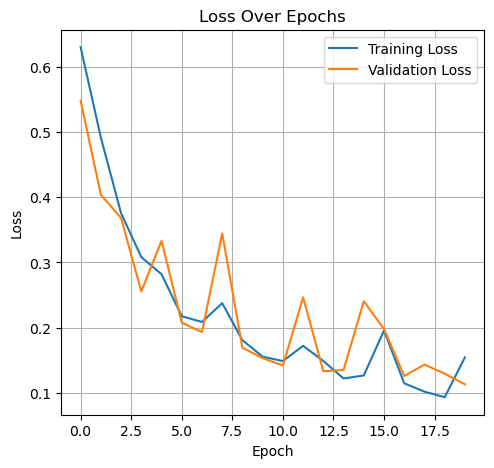

In [32]:
# 4. Evaluate the final accuracy on the entire dataset
loss, accuracy = model_improved.evaluate(pixels, labels, verbose=0)
print(f'\nMaximum accuracy achieved: {accuracy * 100:.2f}%')

# Plot training history to see how the model learned
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

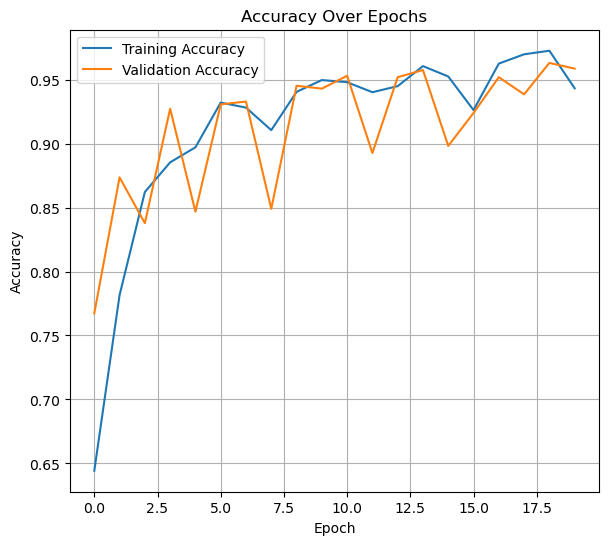

In [33]:
plt.subplot(1, 2, 2)
plt.plot(history_improved.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)